**Team Name:** DataNerds

**Student Details:**

--------------------------

Name : Reshma Vijay Jawale

Student Id : A0236581B

--------------------------
Name : Aiden Low Yew Woei

Student Id : A0121969W

--------------------------
Name : Raivat Bhupesh Shah 

Student Id : A0184879A

--------------------------

In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Cleaning methods
import library_code.cleaning as cleaning
import library_code.constants as constants
import library_code.imputation as imputation
import library_code.auxiliary as auxiliary

# Scikit learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.inspection import permutation_importance

from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Rectangle, Circle
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# For adaboost
from sklearn.ensemble import AdaBoostClassifier


import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df_prices_train = pd.read_csv("../data/train.csv")
df_prices_train_demo = pd.read_csv("../data/train.csv")
df_prices_test = pd.read_csv("../data/test.csv")
df_commercial_centres = pd.read_csv("../data/auxiliary-data/auxiliary-data/sg-commerical-centres.csv")
df_train_stations = pd.read_csv("../data/auxiliary-data/auxiliary-data/sg-train-stations.csv")
df_shopping_malls = pd.read_csv("../data/auxiliary-data/auxiliary-data/sg-shopping-malls.csv")
df_primary_schools = pd.read_csv("../data/auxiliary-data/auxiliary-data/sg-primary-schools.csv")
df_secondary_schools = pd.read_csv("../data/auxiliary-data/auxiliary-data/sg-secondary-schools.csv")
print("Property Prices train dataset", df_prices_train.shape)
display(df_prices_train.head())
print("Aux: Commercial Centres", df_commercial_centres.shape)
display(df_commercial_centres.head())
print("Aux: Train Stations", df_train_stations.shape)
display(df_train_stations.head())
print("Aux: Shopping Malls", df_shopping_malls.shape)
display(df_shopping_malls.head())
print("Aux: Primary Schools", df_primary_schools.shape)
display(df_primary_schools.head())
print("Aux: Secondary Schools", df_secondary_schools.shape)
display(df_secondary_schools.head())

Property Prices train dataset (26048, 23)


,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3,4.0,4,...,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3,3.0,11,...,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4,3.0,11,...,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3,2.0,14,...,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3,3.0,15,...,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0


Aux: Commercial Centres (38, 4)


,name,type,lat,lng
0,Central Business District,CR,1.286768,103.854529
1,Jurong Lake District,CR,1.334085,103.734513
2,Seletar Regional Centre,CR,1.409435,103.866820
3,Tampines Regional Centre,CR,1.353180,103.945188
4,Woodlands Regional Centre,CR,1.436748,103.786485


Aux: Train Stations (166, 6)


,name,codes,lat,lng,opening_year,type
0,Eunos,EW7,1.319778,103.903252,1989.0,mrt
1,Chinese Garden,EW25,1.342352,103.732596,1988.0,mrt
2,Khatib,NS14,1.417383,103.832980,1988.0,mrt
3,Kranji,NS7,1.425177,103.762165,1996.0,mrt
4,Redhill,EW18,1.289562,103.816816,1988.0,mrt


Aux: Shopping Malls (174, 4)


,name,lat,lng,wikipedia_link
0,100 AM,1.275012,103.841372,NaN
1,313@Somerset,1.301013,103.838540,NaN
2,Aperia,1.309714,103.863837,NaN
3,Balestier Hill Shopping Centre,1.325442,103.842521,NaN
4,Bugis Cube,1.298276,103.855555,NaN


Aux: Primary Schools (191, 3)


,name,lat,lng
0,Admiralty Primary School,1.442941,103.800345
1,Ahmad Ibrahim Primary School,1.433849,103.832710
2,Ai Tong School,1.360713,103.833018
3,Alexandra Primary School,1.291284,103.824066
4,Anchor Green Primary School,1.390380,103.887354


Aux: Secondary Schools (150, 3)


,name,lat,lng
0,Admiralty Secondary School,1.445912,103.802908
1,Ahmad Ibrahim Secondary School,1.436095,103.830055
2,Anderson Secondary School,1.375417,103.851723
3,Anglican High School,1.330218,103.941759
4,Anglo-Chinese School (Barker Road),1.319709,103.835661


In [4]:
df_prices_test.head()

,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,subszone,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed
0,1487111,leedon green,leedon heights,condominium,condominium,ocr,strata,2,2.0,10,...,farrer court,1.313566,103.803218,freehold,NaN,638.0,710.0,uncategorized,guarded,2021-12-12
1,6794066,the line @ tanjong rhu,tanjong rhu road,condominium,condominium,ocr,strata,3,2.0,15,...,tanjong rhu,1.298437,103.884408,freehold,2016.0,130.0,1055.0,uncategorized,guarded,2021-10-12
2,4027017,parc elegance,telok kurau road,apartment,apartment,ocr,strata,NaN,1.0,15,...,frankel,1.317851,103.908905,freehold,2013.0,157.0,463.0,uncategorized,guarded,2021-12-23
3,1119141,the jovell,13 flora drive,condominium,condominium,ocr,strata,2,1.0,17,...,flora drive,1.358005,103.965725,leasehold/99 years,1930.0,428.0,645.0,uncategorized,guarded,2021-12-31
4,7374262,shenton way,5 shenton way,condominium,condominium,ocr,strata,4,6.0,1,...,cecil,1.277474,103.849419,leasehold/99 years,NaN,NaN,6200.0,uncategorized,guarded,2021-07-14


# Data Cleaning

The data cleaning steps here are based off our EDA notebook.

In [5]:
# First, drop all fields in TO_IGNORE as these columns are either redundant
# e.g. we drop model because we have type
# or they only have one unique value, e.g. 'market_segment' and 'type_of_area'.
df_prices_train = df_prices_train.drop(columns=constants.TO_IGNORE)
df_prices_test = df_prices_test.drop(columns=constants.TO_IGNORE)

In [6]:
# Then, we clean up the tenure fields to 3 categories: 60 years, 99 years, and freehold/999
df_prices_train['tenure'] = df_prices_train['tenure'].apply(cleaning.tenure_to_binary)
df_prices_test['tenure'] = df_prices_test['tenure'].apply(cleaning.tenure_to_binary)
# Perform one hot encoding
df_prices_train = cleaning.categorical_to_onehot(df_prices_train, ['tenure', 'type', 'region', 'planning_area'])
df_prices_test = cleaning.categorical_to_onehot(df_prices_test, ['tenure', 'type', 'region', 'planning_area'])
# Remove 'planning_area_seletar' column in test as that's not seen in train.
df_prices_test.drop(columns=['planning_area_seletar'], inplace=True)

## Add Additional Data

In [7]:
# Skip, as not in best model.
# df_consumer_prices = pd.read_csv("data/additional_data/consumer_price.csv")

# # Select only the 'all items' data as we need accomodation accounted for in the price index
# df_consumer_prices = df_consumer_prices.loc[df_consumer_prices["level_1"] == "All Items"]

# # Delete the 'level_1' column now as it is the same across all rows
# df_consumer_prices.drop('level_1', axis=1, inplace=True)

# # Set 'month' as index because we know it is unique and this will help the look up later when assining
# # the consumer price index for each listing
# consumer_prices = df_consumer_prices.set_index('month').T.to_dict()

# # Assign a consumer price index value for each row in the training and test sets
# for index, row in df_prices_train.iterrows():
#     curr_listing_date = row['date_listed']
#     curr_year_month = curr_listing_date[:7]
#     df_prices_train.at[index, 'price_index'] = consumer_prices[curr_year_month]['value']

# df_prices_train.head()

In [8]:
# for index, row in df_prices_test.iterrows():
#     curr_listing_date = row['date_listed']
#     curr_year_month = curr_listing_date[:7]
#     df_prices_test.at[index, 'price_index'] = consumer_prices[curr_year_month]['value']

# df_prices_test.head()

# Adding Auxiliary Data (skipped for best model)

In [9]:
# from geopy import distance
# from tqdm import tqdm
# tqdm.pandas()


# def distance_ll(lat1: float, lng1: float, lat2: float, lng2: float) -> float:
#     return distance.distance((lat1, lng1), (lat2, lng2))

# def dist_to_nearest_item(expr: pd.DataFrame, aux_df: pd.DataFrame) -> str:
#     return round(min(aux_df.apply(lambda x: distance_ll(expr['lat'], expr['lng'], x['lat'], x['lng']), axis=1)).km, 1)

# # # Add distance to Primary School.
# # df_prices_train['dist_primary_school'] = df_prices_train.progress_apply(lambda x: dist_to_nearest_item(x, df_primary_schools), axis=1)
# # df_prices_test['dist_primary_school'] = df_prices_test.progress_apply(lambda x: dist_to_nearest_item(x, df_primary_schools), axis=1)


In [11]:
# # Add distance to MRT. This might take some time, especially on older machines.  
# df_prices_train['dist_MRT'] = df_prices_train.progress_apply(lambda x: dist_to_nearest_item(x, df_train_stations), axis=1)
# df_prices_test['dist_MRT'] = df_prices_test.progress_apply(lambda x: dist_to_nearest_item(x, df_train_stations), axis=1)

# # Reduce feature dimension size to a binary variable if within 500m of a MRT or not
# # Reference: https://www.propertyguru.com.sg/property-guides/hdb-near-mrt-how-much-more-56969#:~:text=On%20average%2C%204%2Droom%20HDB,flats%20without%20a%20nearby%20MRT.
# # df_prices_train['dist_MRT'] = df_prices_train['dist_MRT'] < 0.5
# # df_prices_test['dist_MRT'] = df_prices_test['dist_MRT'] < 0.5

In [12]:
# # Add distance to Shopping Mall.
# df_prices_train['dist_mall'] = df_prices_train.progress_apply(lambda x: dist_to_nearest_item(x, df_shopping_malls), axis=1)
# df_prices_test['dist_mall'] = df_prices_test.progress_apply(lambda x: dist_to_nearest_item(x, df_shopping_malls), axis=1)


In [13]:
# # Add distance to Secondary School.
# df_prices_train['dist_sec_school'] = df_prices_train.progress_apply(lambda x: dist_to_nearest_item(x, df_secondary_schools), axis=1)
# df_prices_test['dist_sec_school'] = df_prices_test.progress_apply(lambda x: dist_to_nearest_item(x, df_secondary_schools), axis=1)


## Cleaning values for bedroom and bathroom

Some of the values in the bedroom column are math expressions, e.g. '4+1. We're not sure what this means! Is it 5 bedrooms? Is the +1 because it is not a *full room* (e.g. a servant quarter or living room) or is the +1 referring to a bathroom? Due to these different possibilities, we follow an iterative approach where for we take 4+1 as 5, 4.5 (to quantify only half a room) and 4 (to quantify no room). We will go with the representation that gives us the most accuracy

In [14]:
df_prices_train['bedrooms'] = df_prices_train['bedrooms'].apply(cleaning.process_bedroom_sum)
df_prices_test['bedrooms'] = df_prices_test['bedrooms'].apply(cleaning.process_bedroom_sum)
df_prices_train[df_prices_train['bedrooms'].isna()]

,bedrooms,bathrooms,district,lat,lng,no_of_units,area_size,price,tenure_60,tenure_99,...,planning_area_sembawang,planning_area_sengkang,planning_area_serangoon,planning_area_singapore river,planning_area_southern islands,planning_area_tampines,planning_area_tanglin,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun
59,NaN,1.0,15,1.314620,103.932237,116.0,409.0,715000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,NaN,NaN,6,1.292988,103.851047,39.0,6609.0,27423000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
203,NaN,1.0,2,1.274644,103.844742,360.0,365.0,990000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
296,NaN,1.0,2,1.274644,103.844742,360.0,365.0,1100000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
443,NaN,NaN,22,1.335557,103.742417,738.0,506.0,1045000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25849,NaN,1.0,18,1.376176,103.960488,473.0,571.0,693000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
25866,NaN,2.0,23,1.379727,103.760191,338.0,624.0,825000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
25884,NaN,1.0,1,1.277083,103.849181,510.0,441.0,1099800.0,0,1,...,0,0,0,0,0,0,0,0,0,0
25916,NaN,1.0,7,1.297510,103.856297,522.0,409.0,1098900.0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Dealing with NaN values in Bedrooms, Bathrooms, no_of_units, and area_size column

We have missing values for bedrooms, bathrooms, no_of_units, and area_size column. For handling these, we are using scikit-learn class KNNImputer.

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform.

In [16]:
###### SKIP AS SOMEHOW WITHOUT MINMAX SCALING OUR MODEL PERFORMS BETTER??

# We perform KNN imputation with our custom grid search to pick the best parameters k.
# Imputation is done for: 'bedrooms', 'bathrooms', 'no_of_units', 'area_size'
# Reference: https://stackoverflow.com/questions/68072890/filling-in-missing-data-in-pandas-using-knnimputer

# param_grid = ParameterGrid({"n_neighbors": list(range(1, 21, 2)),
#                             "weights": ['uniform', 'distance']})

# ### NORMALIZE with min-max scaling
# train_df_no_price = df_prices_train.drop(columns=['price'])
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(train_df_no_price)
# train_df_no_price = pd.DataFrame(min_max_scaler.transform(train_df_no_price), columns=train_df_no_price.columns)
# df_prices_test = pd.DataFrame(min_max_scaler.transform(df_prices_test), columns=df_prices_test.columns)
# df_prices_train.update(train_df_no_price)

### DO IMPUTATION Done in our pipeline below.
# imputer = KNNImputer(n_neighbors=5)
# imputer.fit(train_df_no_price)
# train_df_no_price[:] = imputer.transform(train_df_no_price)
# df_prices_test[:] = imputer.transform(df_prices_test)
# unscale back to original values
# train_df_no_price = pd.DataFrame(min_max_scaler.inverse_transform(train_df_no_price), columns=train_df_no_price.columns)
# df_prices_test = pd.DataFrame(min_max_scaler.inverse_transform(df_prices_test), columns=df_prices_test.columns)

In [17]:

# We want our values to make sense. Manually round and trim values to reduce dimensionality.
# train_df_no_price[['bedrooms', 'bathrooms', 'no_of_units']] = train_df_no_price[['bedrooms', 'bathrooms', 'no_of_units']].clip(lower=1)
# train_df_no_price[['bedrooms', 'bathrooms']] = train_df_no_price[['bedrooms', 'bathrooms']].round()
# df_prices_test[['bedrooms', 'bathrooms', 'no_of_units']] = df_prices_test[['bedrooms', 'bathrooms', 'no_of_units']].clip(lower=1)
# df_prices_test[['bedrooms', 'bathrooms']] = df_prices_test[['bedrooms', 'bathrooms']].round()

# GradientBoostingRegressor

In [15]:
# Get data
X_train = df_prices_train.loc[:, df_prices_train.columns != 'price']
y_train = df_prices_train[['price']].values.ravel()
print(X_train.shape)
model = GradientBoostingRegressor()
# Set up pipeline with imputer for proper grid search
# Reference: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
pipeline = Pipeline(steps=[('imputer', KNNImputer()), ('model', model)])

# define grid search for hyperparameters
grid = {
    'imputer__n_neighbors': [3, 5, 7, 11, 15],
    'model__subsample': [0.2, 0.5, 0.9, 1],
    'model__max_features': ['auto', 'sqrt'],
    'model__max_depth': [i for i in range(1, 21, 2)],
    'model__n_estimators': [50, 100, 150, 250, 500],
}


cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# define grid search for hyperparameters
num_features = X_train.shape[1]

mse = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = HalvingGridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, cv=cv, scoring=mse, verbose=1)
# Execute the grid search
grid_results = grid_search.fit(X_train, y_train)

(26048, 55)
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 35
max_resources_: 26048
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2000
n_resources: 35
Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
----------
iter: 1
n_candidates: 667
n_resources: 105
Fitting 10 folds for each of 667 candidates, totalling 6670 fits
----------
iter: 2
n_candidates: 223
n_resources: 315
Fitting 10 folds for each of 223 candidates, totalling 2230 fits
----------
iter: 3
n_candidates: 75
n_resources: 945
Fitting 10 folds for each of 75 candidates, totalling 750 fits
----------
iter: 4
n_candidates: 25
n_resources: 2835
Fitting 10 folds for each of 25 candidates, totalling 250 fits


/opt/homebrew/Caskroom/miniforge/base/envs/cs5228/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


----------
iter: 5
n_candidates: 9
n_resources: 8505
Fitting 10 folds for each of 9 candidates, totalling 90 fits
----------
iter: 6
n_candidates: 3
n_resources: 25515
Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [16]:
# Get RMSE of grid results best score
best_rmse = (-grid_results.best_score_) ** 0.5
print("Best: %f using %s" % (best_rmse, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 730736.559230 using {'imputer__n_neighbors': 15, 'model__max_depth': 5, 'model__max_features': 'auto', 'model__n_estimators': 500, 'model__subsample': 0.5}


In [17]:
# Predict
clf = grid_results
X_test = df_prices_test.loc[:, df_prices_test.columns != 'price']
y_pred = clf.predict(X_test)

In [18]:
result = pd.DataFrame({"Predicted": y_pred})
result.index.name = "Id"
result.to_csv("submission_gradient_boosting_no_aux_add_inflation.csv")

# Feature importance inspection

As gradient boosting is the best model, we run feature inspection to further get insights.

In [29]:
# Use permutation_importance
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/

fitted_model = grid_results
results = permutation_importance(fitted_model, X_train, y_train, scoring="neg_mean_squared_error", n_jobs=-1)

/opt/homebrew/Caskroom/miniforge/base/envs/cs5228/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [25]:
importances_mse = results.importances_mean
# Get columns from train dataframe
cols = df_prices_train.drop(columns=["price"]).columns
# Sort the values with their index
sorted_importances_mse = [(cols[i], score) for i, score in sorted(enumerate(importances_rmse), reverse=True, key=lambda item: item[1])]
sorted_importances_mse

[('area_size', 23012796289740.527),
 ('lng', 1530922438915.173),
 ('lat', 1087178213748.8444),
 ('no_of_units', 538104280745.708),
 ('bathrooms', 320282621096.31854),
 ('district', 304704288975.0056),
 ('planning_area_newton', 224839879862.69635),
 ('planning_area_downtown core', 224357490399.3139),
 ('bedrooms', 155423810549.31973),
 ('region_central region', 98063475541.91997),
 ('planning_area_singapore river', 44446983792.92919),
 ('planning_area_river valley', 43580047225.50222),
 ('planning_area_orchard', 40002713874.16703),
 ('tenure_99', 32338510243.731346),
 ('type_condominium', 24175510178.14578),
 ('planning_area_tanglin', 20115453960.807755),
 ('type_apartment', 16157248581.568539),
 ('tenure_freehold', 15699369113.381023),
 ('planning_area_kallang', 11833236217.649128),
 ('planning_area_geylang', 10760704515.422901),
 ('planning_area_rochor', 9376695324.395634),
 ('planning_area_queenstown', 6709219765.549698),
 ('planning_area_southern islands', 6375546113.3484955),
 ('pl

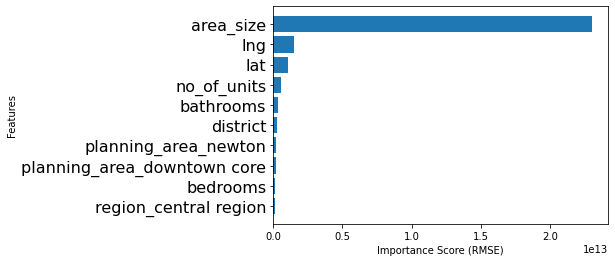

In [35]:
# Plot results
features = [x[0] for x in sorted_importances_rmse[:10]]
score = [x[1] for x in sorted_importances_rmse[:10]]
plt.barh(features, score)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()
plt.ylabel("Features")
plt.xlabel("Importance Score (RMSE)")
plt.show()

# Synthetic Data analysis

In [30]:
df_prices_train.columns

Index(['bedrooms', 'bathrooms', 'district', 'lat', 'lng', 'no_of_units',
       'area_size', 'price', 'tenure_60', 'tenure_99', 'tenure_freehold',
       'type_apartment', 'type_condominium', 'region_central region',
       'region_east region', 'region_north region', 'region_north-east region',
       'region_west region', 'planning_area_ang mo kio', 'planning_area_bedok',
       'planning_area_bishan', 'planning_area_bukit batok',
       'planning_area_bukit merah', 'planning_area_bukit panjang',
       'planning_area_bukit timah', 'planning_area_changi',
       'planning_area_choa chu kang', 'planning_area_clementi',
       'planning_area_downtown core', 'planning_area_geylang',
       'planning_area_hougang', 'planning_area_jurong east',
       'planning_area_jurong west', 'planning_area_kallang',
       'planning_area_mandai', 'planning_area_marine parade',
       'planning_area_museum', 'planning_area_newton', 'planning_area_novena',
       'planning_area_orchard', 'planning_area

In [42]:
pd.set_option('display.max_colwidth', None)
df_prices_test.mode()

,bedrooms,bathrooms,district,lat,lng,no_of_units,area_size,tenure_60,tenure_99,tenure_freehold,...,planning_area_sembawang,planning_area_sengkang,planning_area_serangoon,planning_area_singapore river,planning_area_southern islands,planning_area_tampines,planning_area_tanglin,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun
0,2.0,2.0,10,1.276715,103.853327,1042.0,678.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_prices_test.loc[7441]

bedrooms                             3.000000
bathrooms                            2.000000
district                            10.000000
lat                                  1.313566
lng                                103.803218
no_of_units                        638.000000
area_size                         1356.000000
tenure_60                            0.000000
tenure_99                            0.000000
tenure_freehold                      1.000000
type_apartment                       0.000000
type_condominium                     1.000000
region_central region                1.000000
region_east region                   0.000000
region_north region                  0.000000
region_north-east region             0.000000
region_west region                   0.000000
planning_area_ang mo kio             0.000000
planning_area_bedok                  0.000000
planning_area_bishan                 0.000000
planning_area_bukit batok            0.000000
planning_area_bukit merah         

/opt/homebrew/Caskroom/miniforge/base/envs/cs5228/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


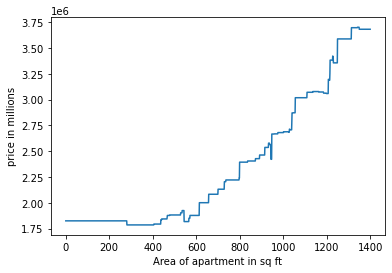

In [85]:
# District 10 example (bukit timah)
row = df_prices_test.loc[7441].values
# Permute area size https://www.propwise.sg/singapore-property-beginners-guide-part-1-public-and-private-housing/
# from 350 to 1400 square feet
synthetic_data = np.tile(row, (1400, 1))
sq_ft_values = list(range(1400))
for index, sq_ft in enumerate(sq_ft_values):
    synthetic_data[index, 6] = sq_ft
pred = clf.predict(synthetic_data)
plt.plot(sq_ft_values, pred)
plt.xlabel("Area of apartment in sq ft")
plt.ylabel("price in millions")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/cs5228/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


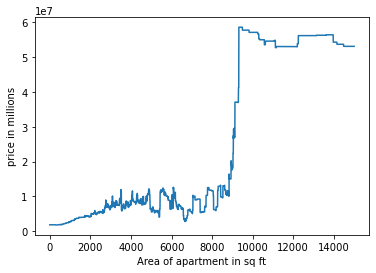

In [88]:
# District 10 example (bukit timah)
row = df_prices_test.loc[7441].values
# Permute area size https://www.propwise.sg/singapore-property-beginners-guide-part-1-public-and-private-housing/
# from 350 to 1400 square feet
synthetic_data = np.tile(row, (15000, 1))
sq_ft_values = list(range(15000))
for index, sq_ft in enumerate(sq_ft_values):
    synthetic_data[index, 6] = sq_ft
pred = clf.predict(synthetic_data)
plt.plot(sq_ft_values, pred)
plt.xlabel("Area of apartment in sq ft")
plt.ylabel("price in millions")
plt.show()

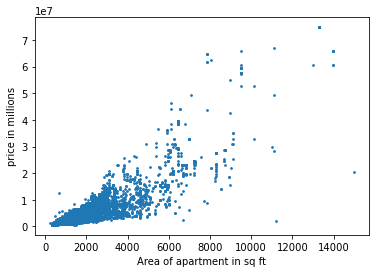

In [80]:
train_area = df_prices_train['area_size']
train_price = df_prices_train['price']
plt.scatter(train_area, train_price, s = 3)
plt.xlabel("Area of apartment in sq ft")
plt.ylabel("price in millions")
plt.show()

In [83]:
df_prices_train['area_size'].max()

15000.0

In [90]:
df_prices_train['lat'].max()

1.4564362540931202

In [157]:
# latitude and longitude tests
row = df_prices_test.loc[7441].values
# Permute area size https://www.propwise.sg/singapore-property-beginners-guide-part-1-public-and-private-housing/
max_long = 104.02
min_long = 103.610
max_lat = 1.470
min_lat = 1.229
print(max_long, min_long, max_lat, min_lat)

104.02 103.61 1.47 1.229


In [171]:
# permute lat and long in .002 increments
lat_long_synthetic = []
for lat in np.arange(min_lat, max_lat, 0.002):
    for lng in np.arange(min_long, max_long, 0.002):
        lat_long_synthetic.append((lat, lng))
synthetic_data = np.tile(row, (len(lat_long_synthetic), 1))
for index, coord in enumerate(lat_long_synthetic):
    lat, lng = coord
    synthetic_data[index, 3] = round(lat, 4)
    synthetic_data[index, 4] = round(lng, 4)
pred = clf.predict(synthetic_data)

/opt/homebrew/Caskroom/miniforge/base/envs/cs5228/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


In [172]:
lat = synthetic_data[:, 3]
lng = synthetic_data[:, 4]
df = pd.DataFrame.from_dict(np.array([lng, lat, pred]).T)
df.columns = ['lng', 'lat', 'price']
df['price'] = pd.to_numeric(df['price'])

In [173]:
pivotted = df.pivot('lat', 'lng', 'price')

In [174]:
import seaborn as sns

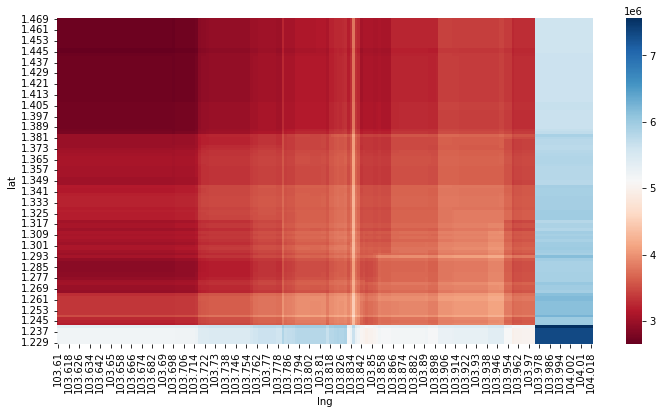

In [175]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(pivotted, cmap='RdBu')
ax.invert_yaxis()